# 1. Data Loading and First Impressions

In [2]:
options(warn=-1) #Suppresses warnings
library(knitr)
library(boot)
library(Metrics)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(caret)
library(gridExtra)
library(scales)
library(Rmisc)
library(ggrepel)
library(randomForest)
library(xgboost)
library(psych)
library(glmnet)
library(ranger)
library(tidyverse)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.84 loaded
Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma


Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':


In [3]:
setwd('C:\\Users\\Rohan\\OneDrive\\Desktop\\Rohan Workspace\\Semester 2\\01 Data Mining\\08 Project\\02 Data\\01 Raw Data')
getwd()

#this.dir <- dirname(parent.frame(2)$ofile)
#setwd(this.dir)

[1] "C:/Users/Rohan/OneDrive/Desktop/Rohan Workspace/Semester 2/01 Data Mining/08 Project/02 Data/01 Raw Data"

In [4]:
train <- read.csv('train.csv', stringsAsFactors=F)
test <- read.csv('test.csv', stringsAsFactors = F)
head(train,3)
head(test,3)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal


## Data Size / Structure

In [5]:
dim(train)
dim(test)

[1] 1460   81

[1] 1459   80

In [6]:
str(train)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


Our DV is SalePrice. The dataset is composed of character and integers variables. Using the command stringasFactor = False, we end up with only characters. We will most likely have to do cleaning, to ensure that the right factors are encoded where we want them, as the default R parser tends to make mistakes. 

We will not be needing the ID column.

In [7]:
testID <- test$Id

train$Id <- NULL
test$Id <- NULL

In [8]:
dim(test)
dim(train)

[1] 1459   79

[1] 1460   80

For the purpose of data cleaning, We will merge the train and test datasets together. 

In [9]:
test$SalePrice <- NA
df <- rbind(train,test)
dim(df)

[1] 2919   80

We then have our Response Variable, SalePrice, and 79 predictors for 2919 rows of data.

# 2. Variables Exploration

## Sale Price

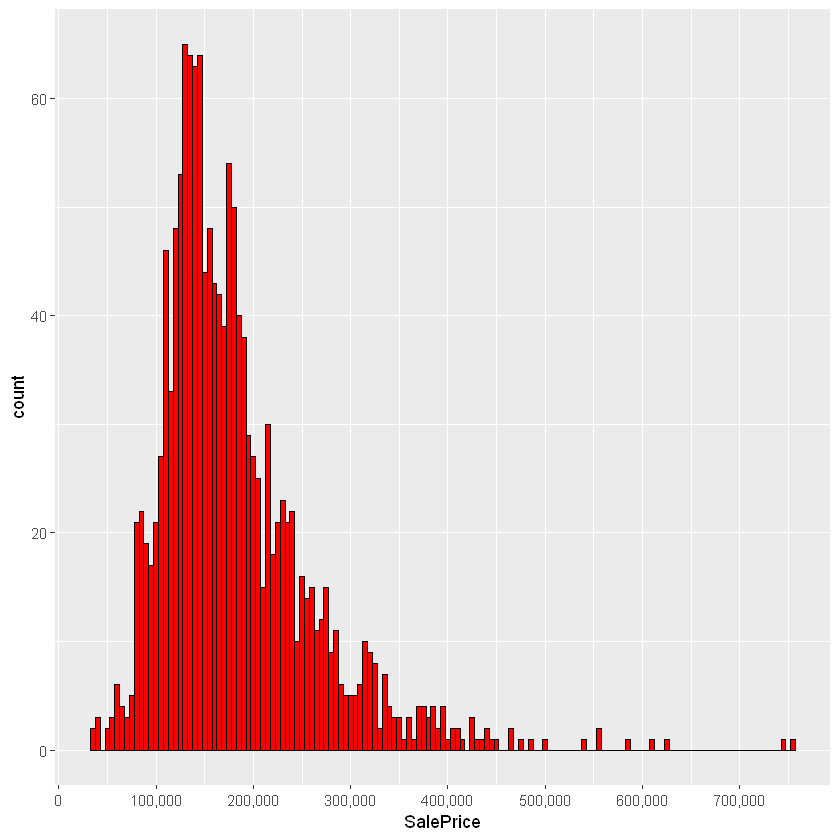

In [10]:
ggplot(data = df[!is.na(df$SalePrice),], aes(x=SalePrice)) +
    geom_histogram(colour='black',fill='red',binwidth=5000)+
    scale_x_continuous(breaks = seq(0,800000,by=100000),labels=comma) 

The sales prices are rightly skewed, which makes sense since most people cannot afford expensive houses.

In [11]:
summary(df$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34900  129975  163000  180921  214000  755000    1459 

Looking at the summary, we see that the median and the mean are roughly 17k away from each other, which coincides with our visualization since there are outliers skewing the data and bumping the mean compared to the median.

## Numeric Predictors

In [12]:
num <- which(sapply(df,is.numeric))
numname <- names(num)
length(num) #37 numeric variables in the dataset

[1] 37

First, let's explore some of the correlations in the dataset to have a feel for the data, while trying to detect potentially dommageable multicollinearity within the data

Correlation with SalePrice

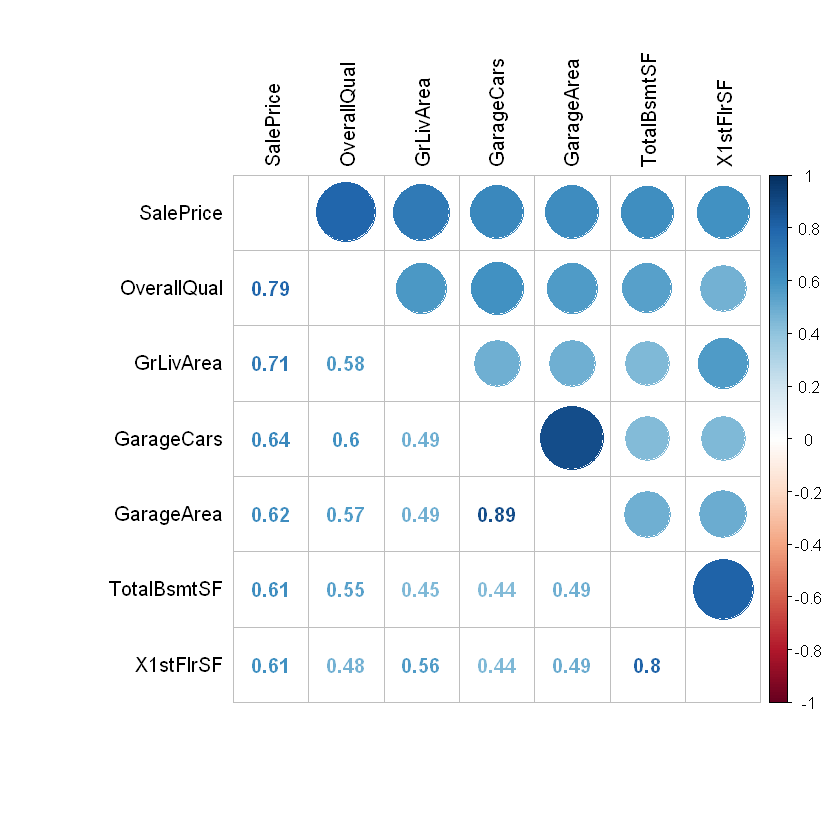

In [13]:
df_num <- df[,num] #Creates the dataframe with numeric variables only
cor_dfnum <- cor(df_num, use = 'pairwise.complete.obs')

# Sort by decreasing correlations with SalePrice
cor_sort <- as.matrix(sort(cor_dfnum[,'SalePrice'],decreasing = TRUE))

# Only get ones where correlation is above 0.6
cor_strong <- names(which(apply(cor_sort,1,function(x) abs (x) > 0.6)))
cor_dfnum <- cor_dfnum[cor_strong,cor_strong]
                                
corrplot.mixed(cor_dfnum, tl.col = 'black',tl.pos='lt')

SalePrice is highly correlated with the Overall Quality and the 'GrLivArea' which corresponds to the area above ground, respectively 0.79 and 0.71.

There seem to be a strong multicollinearity between Garage Area and Garage Cars (which is the size of the garage in sq meters VS size of the garage in terms of how many cars it can hold) with 0.89.
Furthermore, there is a strong correlation between X1stFlSF (square footage on the 1st floor) and the Total Basement Square Footage, which makes total sense since basements usually have a very similar square footage to the 1st floor.

# 3. Missing Data and Factors/Ordinal

## Missing Values

In [14]:
table(is.na(df))


 FALSE   TRUE 
218096  15424 

There are 15424 NA's in the data. 

In [15]:
#NAS <- which(colSums(is.na(df))>0)
sort(colSums(sapply(df[which(colSums(is.na(df))>0)],is.na)),decreasing = TRUE)

PoolQC  MiscFeature        Alley        Fence    SalePrice  FireplaceQu 
        2909         2814         2721         2348         1459         1420 
 LotFrontage  GarageYrBlt GarageFinish   GarageQual   GarageCond   GarageType 
         486          159          159          159          159          157 
    BsmtCond BsmtExposure     BsmtQual BsmtFinType2 BsmtFinType1   MasVnrType 
          82           82           81           80           79           24 
  MasVnrArea     MSZoning    Utilities BsmtFullBath BsmtHalfBath   Functional 
          23            4            2            2            2            2 
 Exterior1st  Exterior2nd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF 
           1            1            1            1            1            1 
  Electrical  KitchenQual   GarageCars   GarageArea     SaleType 
           1            1            1            1            1

There are 35 columns with missing data

## What to do with the many missing values 

We will deal with missing values starting from the columns with the most missing values. Some values can be easily imputable, whereas some others may need some deeper processing. Furthermore, depending on the variable, there may be some character variables that can be encoded as ordinal - for example, the pool quality, going from No Pool = 0 to Excellent = 5. 

In [16]:
# Function to get number of missing values from any column

na_check <- function(var){ 
    y = which(colnames(df)==var)
    x = sum(is.na(df[y]))
    z = colnames(df[y])
    cat('There are',x,'missing values in column',z)
}

###  Pool Quality

In [17]:
na_check('PoolQC')

There are 2909 missing values in column PoolQC

In [18]:
unique(df$PoolQC)

[1] NA   "Ex" "Fa" "Gd"

According to the document, these are the different pool qualities available

   Ex   Excellent
   
   Gd   Good
   
   TA   Average/Typical
   
   Fa   Fair
   
   NA   No Pool
   
And from what we have seen above, the NA's actually mean that there is no pool, so we will simply input a value 'No Pool' in place of the NA. we will also encode an ordinal vector representing the quality of the pool.

In [19]:
df$PoolQC[is.na(df$PoolQC)] <- 'No Pool'

In [20]:
PoolQualities  <- c('No Pool'=0, 'Fa'=1,'Gd'=2,'Ex'=3)
df$PoolQC <- as.integer(revalue(df$PoolQC,PoolQualities))
table(df$PoolQC)


   0    1    2    3 
2909    2    4    4 

Let's check to make sure there are no houses left with pools that have not been inputted correctly.

In [21]:
df[df$PoolArea>0 & df$PoolQC==0,c('PoolArea','PoolQC')]

,PoolArea,PoolQC
2421,368,0
2504,444,0
2600,561,0


Because we cannot know wheter there was a mistake, or perhaps the pool is damaged, we will assume that there is no pool and assign 0 to the pool area.

In [22]:
df$PoolArea[df$PoolArea>0 & df$PoolQC==0] <- 0

In [23]:
# Check
c = c('PoolArea','PoolQC')
df[2421,c]
df[2504,c]
df[2600,c]

,PoolArea,PoolQC
2421,0,0


,PoolArea,PoolQC
2504,0,0


,PoolArea,PoolQC
2600,0,0


### Miscellaneous Features

In [24]:
na_check('MiscFeature')
unique(df$MiscFeature)

There are 2814 missing values in column MiscFeature

[1] NA     "Shed" "Gar2" "Othr" "TenC"

There are 2814 missing values, and according to the document, the different categories of miscellaneous features are as follows. 

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
Thus I will replace the NA with 'No Features'. Additionally, since there is no order, I can turn this variable into a factor.

In [25]:
df$MiscFeature[is.na(df$MiscFeature)] <- 'No Features'
df$MiscFeature <- as.factor(df$MiscFeature)

In [26]:
table(df$MiscFeature)


       Gar2 No Features        Othr        Shed        TenC 
          5        2814           4          95           1 

### Type of Alley

In [27]:
na_check('Alley')
unique(df$Alley)

There are 2721 missing values in column Alley

[1] NA     "Grvl" "Pave"

There are 2721 missing values, and according to the document, the different categories of alleys are:
    
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
 
Thus we will replace the NA with 'No alley'. However, We are not sure whether the variable is ordinal or not. 

In [28]:
df$Alley[is.na(df$Alley)] <- 'No Alley'

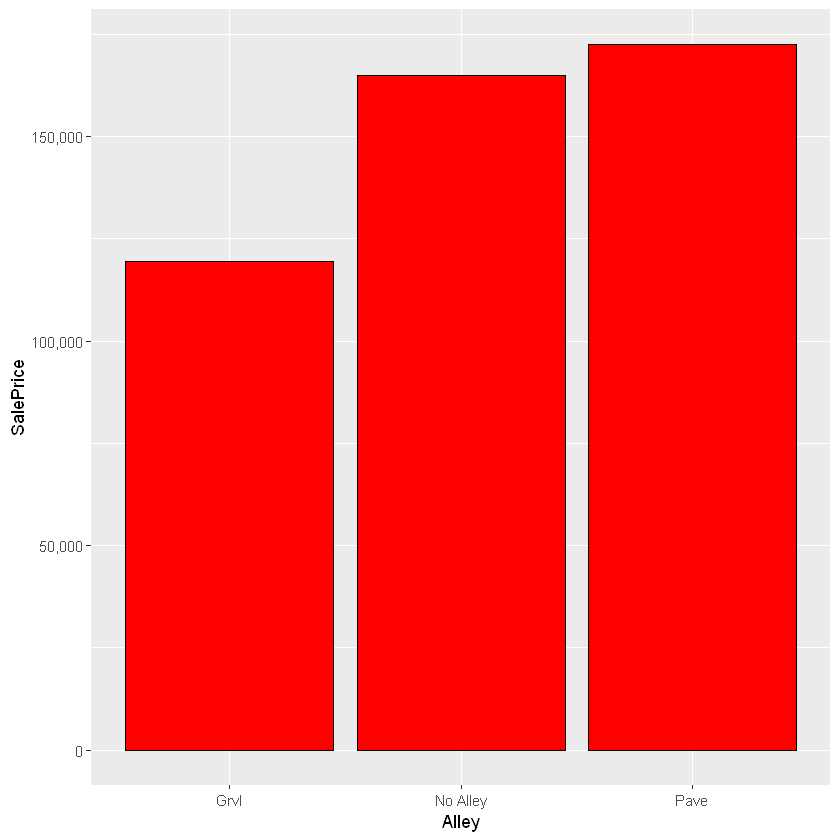

In [29]:
# Checking if there is any kind of order in the alley variables

ggplot(df[!is.na(df$SalePrice),], aes(x=Alley, y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "median", fill='red',colour='black')+
        scale_y_continuous(breaks= seq(0, 200000, by=50000), labels = comma)

In [30]:
# There is no ordinality. Thus, 
df$Alley <- as.factor(df$Alley)
table(df$Alley)


    Grvl No Alley     Pave 
     120     2721       78 

### Type of Fences

In [31]:
na_check('Fence')
unique(df$Fence)

There are 2348 missing values in column Fence

[1] NA      "MnPrv" "GdWo"  "GdPrv" "MnWw"

There are 2348 missing values, and according to the document, the fence categories are as follows:

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
We will replace NA with 'No Fence'. The values do not seem ordinal, We will turn them into a factor.

In [32]:
df$Fence[is.na(df$Fence)] <- 'No Fence'
df$Fence <- as.factor(df$Fence)

In [33]:
table(df$Fence)


   GdPrv     GdWo    MnPrv     MnWw No Fence 
     118      112      329       12     2348 

### Fireplace Quality and Quantity

In [34]:
na_check('FireplaceQu')
unique(df$FireplaceQu)

There are 1420 missing values in column FireplaceQu

[1] NA   "TA" "Gd" "Fa" "Ex" "Po"

There are 1420 missing values in the Fireplace Quality variable. According to the document, the following are the fireplace qualities:

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or 
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

       
Since the number of houses with no fireplaces matches the number of NAs in fireplace quality, We can replace the NA with 'No Fireplace'. The quality is clearly ordinal. 

In [35]:
df$FireplaceQu[is.na(df$FireplaceQu)] <- 'No Fireplace'
table(df$FireplaceQu)


          Ex           Fa           Gd No Fireplace           Po           TA 
          43           74          744         1420           46          592 

In [36]:
FirePlaceQuality <- c('No Fireplace'=0,'Po'=1,'Fa'=2,'TA'=3,'Gd'=4,'Ex'=5)
df$FireplaceQu <- as.integer(revalue(df$FireplaceQu,FirePlaceQuality))
table(df$FireplaceQu)


   0    1    2    3    4    5 
1420   46   74  592  744   43 

In [37]:
na_check('FireplaceQu')

There are 0 missing values in column FireplaceQu

In [38]:
na_check('Fireplaces')
table(df$Fireplaces)

 # No missing values in the Fireplaces columns

There are 0 missing values in column Fireplaces


   0    1    2    3    4 
1420 1268  219   11    1 

### Lot Variables

Lot Frontage is the linear feets of street connected to the property. 

In [39]:
na_check('LotFrontage')
typeof(df$LotFrontage)

There are 486 missing values in column LotFrontage

[1] "integer"

In this case, getting rid of the NAs would significantly reduce our sample size. Thus, it is best to impute the median per neighborhood.

In [40]:
for (i in 1:nrow(df)){
    if(is.na(df$LotFrontage[i])){
        df$LotFrontage[i] <- as.integer(median(df$LotFrontage[df$Neighborhood==df$Neighborhood[i]], na.rm=TRUE))
    }
}

In [41]:
# Check if it worked
na_check('LotFrontage')

There are 0 missing values in column LotFrontage

In [42]:
summary(df$LotFrontage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   60.00   70.00   69.54   80.00  313.00 

Lot Shape

In [43]:
na_check('LotShape')

There are 0 missing values in column LotShape

General shape of the property, with no missing values. According to the doc, this is what we have:

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
There is a clear order, with regular being the best and irregular being the worst. Thus, We will encode this one as an ordinal variable.

In [44]:
LotShapeQuality  <- c('IR3'=0, 'IR2'=1, 'IR1'=2, 'Reg'=3)
df$LotShape <- as.integer(revalue(df$LotShape,LotShapeQuality))
table(df$LotShape)


   0    1    2    3 
  16   76  968 1859 

Lot Config

Now onto dealing with Lot Configuration - That it, the overall shape of the property. 
We are not sure whether the values are ordinal or simply categorical - We'll use a simple visualization to represent it.

In [45]:
na_check('LotConfig')
typeof(df$LotConfig)

There are 0 missing values in column LotConfig

[1] "character"

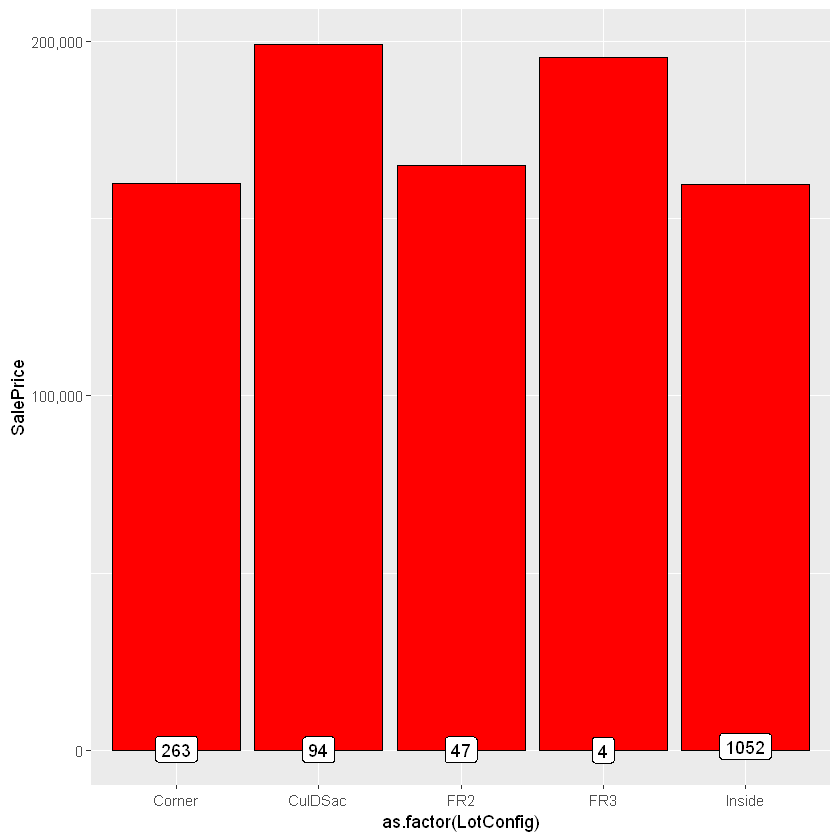

In [46]:
ggplot(df[!is.na(df$SalePrice),], aes(x=as.factor(LotConfig), y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "median", fill='red',colour='black') +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) + 
        geom_label(stat = "count", aes(label = ..count.., y = ..count..))

There is no clear order - Thus this variable is a factor.

In [47]:
df$LotConfig <- as.factor(df$LotConfig)
table(df$LotConfig)
levels(df$LotConfig) #Quick check


 Corner CulDSac     FR2     FR3  Inside 
    511     176      85      14    2133 

[1] "Corner"  "CulDSac" "FR2"     "FR3"     "Inside"

### Garage Variables

There are 7 variables related to features of the garage.

    GarageYrBlt, 159 NA
    GarageFinish, 159 NA
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

    GarageQual,  159 NA
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

    GarageCond,  159 NA
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

    GarageType,  157 NA
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

    GarageCars,  1 NA 
    GarageArea,  1 NA
    
GarageYrBlt can be infered from the year of construction of the house - some garages may have been built after, but it is reasonable to say those constructions require permits, so it would most likely recorded if the house and garage had different construction years.

Garage Finish/quality/condition/type are easy to deal with, just replace NA by 'No Garage'. Some seem ordinal, like condition, some are not, like the type. We will deal with those as we go.


In [48]:
Gar <- c('GarageYrBlt','GarageCars','GarageArea','GarageType','GarageCond','GarageQual','GarageFinish')

In [49]:
df$GarageYrBlt[is.na(df$GarageYrBlt)] <- df$YearBuilt[is.na(df$GarageYrBlt)]

We need to find the 2 rows of discrepancy between 159 NA and 157 NA to have everything cleaned up

In [50]:
kable(df[!is.na(df$GarageType) & is.na(df$GarageFinish), Gar])



|     | GarageYrBlt| GarageCars| GarageArea|GarageType |GarageCond |GarageQual |GarageFinish |
|:----|-----------:|----------:|----------:|:----------|:----------|:----------|:------------|
|2127 |        1910|          1|        360|Detchd     |NA         |NA         |NA           |
|2577 |        1923|         NA|         NA|Detchd     |NA         |NA         |NA           |

House 2577 does not have a garage, and house 2127 seems to have one. Thus, there are 158 houses without a garage. 
For house 2127, I will input the mode - naive imputation.

In [51]:
# Fixing 2127

df$GarageCond[2127] <- names(sort(-table(df$GarageCond)))[1]
df$GarageQual[2127] <- names(sort(-table(df$GarageQual)))[1]
df$GarageFinish[2127] <- names(sort(-table(df$GarageFinish)))[1]

In [52]:
df[2127,Gar]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
2127,1910,1,360,Detchd,TA,TA,Unf


In [53]:
# Fixing 2577 - Does not have a garage

df$GarageCars[2577] <- 0
df$GarageType[2577] <- NA
df$GarageArea[2577] <- 0

In [54]:
na_check('GarageType')

There are 158 missing values in column GarageType

In this section, We will provide a brief commentary about the variable and how I transform it

In [55]:
# Garage Type - Not ordinal, factor, and NA means no garage

df$GarageType[is.na(df$GarageType)] <- 'No Garage'
df$GarageType <- as.factor(df$GarageType)
table(df$GarageType)


   2Types    Attchd   Basment   BuiltIn   CarPort    Detchd No Garage 
       23      1723        36       186        15       778       158 

In [56]:
# Garage Finish - ordinal, replace NA with no garage

# NA = No Garage, Unf = Unfinished, RFn = Rough Finish, Fin = Finished

df$GarageFinish[is.na(df$GarageFinish)] <- 'No Garage'
df$GarageFinish <- as.integer(revalue(df$GarageFinish,c('No Garage'=0,'Unf'=1,'RFn'=2,'Fin'=3)))
table(df$GarageFinish)


   0    1    2    3 
 158 1231  811  719 

In [57]:
# Garage Quality - ordinal, NA means no garage

# NA = No Garage, Po = Poor, Fa = Fair, TA = Typical, Gd = Good, Ex = Excellent

df$GarageQual[is.na(df$GarageQual)] <- 'No Garage'
Qualities  <- c('No Garage'=0,'Po'=1,'Fa'=2,'TA'=3,'Gd'=4,'Ex'=5)
df$GarageQual <- as.integer(revalue(df$GarageQual,Qualities))
table(df$GarageQual)


   0    1    2    3    4    5 
 158    5  124 2605   24    3 

In [58]:
# Garage Condition - ordinal, NA means no garage

df$GarageCond[is.na(df$GarageCond)] <- 'No Garage'
df$GarageCond <- as.integer(revalue(df$GarageCond,Qualities))
table(df$GarageCond)


   0    1    2    3    4    5 
 158   14   74 2655   15    3 

In [59]:
# What do we have remaining? 
sort(colSums(sapply(df[which(colSums(is.na(df))>0)],is.na)),decreasing = TRUE)

SalePrice     BsmtCond BsmtExposure     BsmtQual BsmtFinType2 BsmtFinType1 
        1459           82           82           81           80           79 
  MasVnrType   MasVnrArea     MSZoning    Utilities BsmtFullBath BsmtHalfBath 
          24           23            4            2            2            2 
  Functional  Exterior1st  Exterior2nd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF 
           2            1            1            1            1            1 
 TotalBsmtSF   Electrical  KitchenQual     SaleType 
           1            1            1            1

### Basement Variables 

11 variables related to the Basement 

5 of those variables have between 79 and 82 NAs

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

In [60]:
# Are the Nas in one category the same at the ones in the other?

length(which(is.na(df$BsmtQual) & is.na(df$BsmtCond) 
             & is.na(df$BsmtExposure) & is.na(df$BsmtFinType1) & is.na(df$BsmtFinType2)))

[1] 79

In [61]:
# Where are the additional NAs

df[!is.na(df$BsmtFinType1) & (is.na(df$BsmtCond)|is.na(df$BsmtQual)|is.na(df$BsmtExposure)|is.na(df$BsmtFinType2)), 
    c('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2')]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
333,Gd,TA,No,GLQ,NA
949,Gd,TA,NA,Unf,Unf
1488,Gd,TA,NA,Unf,Unf
2041,Gd,NA,Mn,GLQ,Rec
2186,TA,NA,No,BLQ,Unf
2218,NA,Fa,No,Unf,Unf
2219,NA,TA,No,Unf,Unf
2349,Gd,TA,NA,Unf,Unf
2525,TA,NA,Av,ALQ,Unf


In [62]:
# Imputing modes for each missing variable in houses WITH basements

df$BsmtFinType2[333] <- names(sort(-table(df$BsmtFinType2)))[1]
df$BsmtExposure[c(949, 1488, 2349)] <- names(sort(-table(df$BsmtExposure)))[1]
df$BsmtCond[c(2041, 2186, 2525)] <- names(sort(-table(df$BsmtCond)))[1]
df$BsmtQual[c(2218, 2219)] <- names(sort(-table(df$BsmtQual)))[1]

We now have 79 houses with no basement. Now, let's see whether they are ordinal or categorical

In [63]:
# Basement Quality - Height of the basement

# Same qualities, clearly ordinal

df$BsmtQual[is.na(df$BsmtQual)] <- 'No Bsmt'
Qualities  <- c('No Bsmt'=0,'Po'=1,'Fa'=2,'TA'=3,'Gd'=4,'Ex'=5)
df$BsmtQual <- as.integer(revalue(df$BsmtQual,Qualities))
table(df$BsmtQual)

The following `from` values were not present in `x`: Po



   0    2    3    4    5 
  79   88 1285 1209  258 

In [64]:
# Basement Cond - General condition of the basement

# Same qualities, ordinal as well

df$BsmtCond[is.na(df$BsmtCond)] <- 'No Bsmt'
df$BsmtCond <- as.integer(revalue(df$BsmtCond,Qualities))
table(df$BsmtCond)

The following `from` values were not present in `x`: Ex



   0    1    2    3    4 
  79    5  104 2609  122 

In [65]:
# Basement Exps - Walkout/garden level walls

# Ordinal as well, different qualities

df$BsmtExposure[is.na(df$BsmtExposure)] <- 'No Bsmt'
Exposure <- c('No Bsmt'=0, 'No'=1, 'Mn'=2, 'Av'=3, 'Gd'=4)

df$BsmtExposure<-as.integer(revalue(df$BsmtExposure, Exposure))
table(df$BsmtExposure)


   0    1    2    3    4 
  79 1907  239  418  276 

In [66]:
# Basement FinType1 - Rating of basement finished area

# Also ordinal, different qualities

df$BsmtFinType1[is.na(df$BsmtFinType1)] <- 'No Bsmt'
FinType <- c('No Bsmt'=0, 'Unf'=1, 'LwQ'=2, 'Rec'=3, 'BLQ'=4, 'ALQ'=5, 'GLQ'=6)

df$BsmtFinType1<-as.integer(revalue(df$BsmtFinType1, FinType))
table(df$BsmtFinType1)


  0   1   2   3   4   5   6 
 79 851 154 288 269 429 849 

In [67]:
# Basement FinType2 - Rating of basement finished area if multiple types
df$BsmtFinType2[is.na(df$BsmtFinType2)] <- 'No Bsmt'

df$BsmtFinType2<-as.integer(revalue(df$BsmtFinType2, FinType))
table(df$BsmtFinType2)


   0    1    2    3    4    5    6 
  79 2494   87  105   68   52   34 

In [68]:
# Dealing with the few NAs remaining in the remaining basement variables - here we are assuming 
# that all missing variables really represent a 0, meaning there is no basement

df$BsmtFullBath[is.na(df$BsmtFullBath)] <- 0
df$BsmtHalfBath[is.na(df$BsmtHalfBath)] <- 0
df$BsmtFinSF1[is.na(df$BsmtFinSF1)] <- 0
df$BsmtFinSF2[is.na(df$BsmtFinSF2)] <- 0
df$BsmtUnfSF[is.na(df$BsmtUnfSF)] <- 0
df$TotalBsmtSF[is.na(df$TotalBsmtSF)] <- 0

In [69]:
# What do we have remaining? 
sort(colSums(sapply(df[which(colSums(is.na(df))>0)],is.na)),decreasing = TRUE)

SalePrice  MasVnrType  MasVnrArea    MSZoning   Utilities  Functional 
       1459          24          23           4           2           2 
Exterior1st Exterior2nd  Electrical KitchenQual    SaleType 
          1           1           1           1           1

### Masonry Variables

2 variables relate to masonry, with Masonry Veneer Type having 24 NAs and Masonry Veneer Area having 23. Logically, if a house has a veneer area, it must have a veneer type, so I must find the one that is missing.

In [70]:
df[is.na(df$MasVnrType) & !is.na(df$MasVnrArea),c('MasVnrType','MasVnrArea')]

,MasVnrType,MasVnrArea
2611,NA,198


In [71]:
df$MasVnrType[2611] <- names(sort(-table(df$MasVnrType)))[2]

In [72]:
df[2611,c('MasVnrType','MasVnrArea')]

,MasVnrType,MasVnrArea
2611,BrkFace,198


Is there ordinality with the type of masonry?

In [73]:
df$MasVnrType[is.na(df$MasVnrType)] <- 'None'

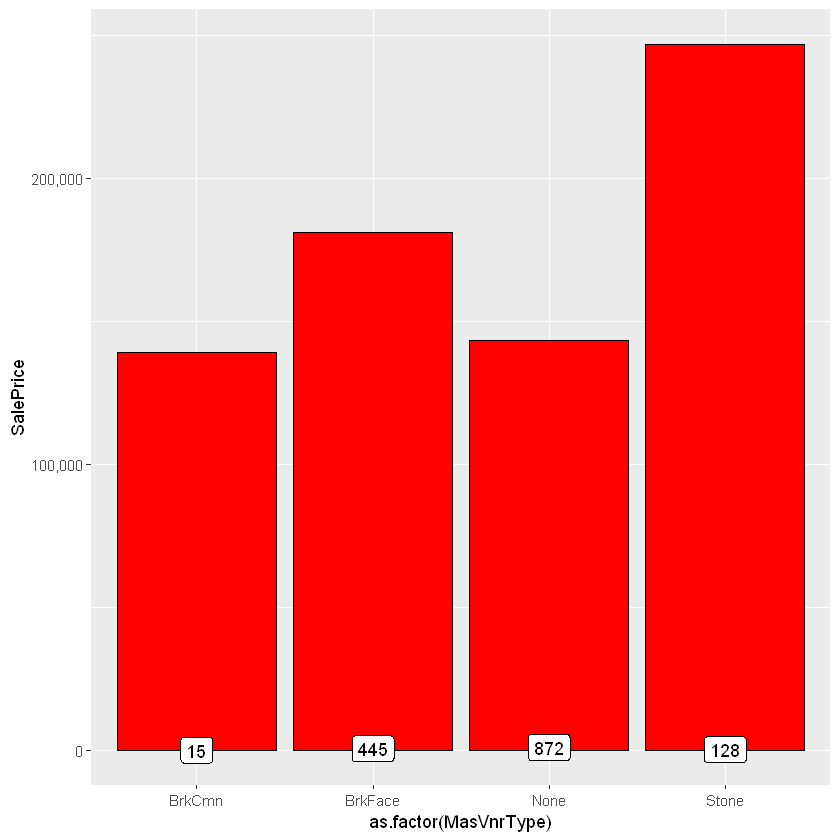

In [74]:
ggplot(df[!is.na(df$SalePrice),], aes(x=as.factor(MasVnrType), y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "median", fill='red',colour='black') +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma) + 
        geom_label(stat = "count", aes(label = ..count.., y = ..count..))

Houses made of stone are more expensive. Thus the category is ordinal.

In [75]:
MasonryType <- c('None'=0, 'BrkCmn'=0, 'BrkFace'=1, 'Stone'=2)
df$MasVnrType <- as.integer(revalue(df$MasVnrType,MasonryType))
table(df$MasVnrType)


   0    1    2 
1790  880  249 

In [76]:
df$MasVnrArea[is.na(df$MasVnrArea)] <- 0 # We saw previously that those houses do not have masonry

### Dealing with the remaining variables

In [77]:
# What do we have remaining? 
sort(colSums(sapply(df[which(colSums(is.na(df))>0)],is.na)),decreasing = TRUE)

SalePrice    MSZoning   Utilities  Functional Exterior1st Exterior2nd 
       1459           4           2           2           1           1 
 Electrical KitchenQual    SaleType 
          1           1           1

In [78]:
names(sort(-table(df$MSZoning)))[1]

[1] "RL"

In [79]:
# MS Zoning - Categorical values, 4 NAs 

df$MSZoning[is.na(df$MSZoning)] <- names(sort(-table(df$MSZoning)))[1]
df$MSZoning <- as.factor(df$MSZoning)

# Utilities - Kitchen Quality, ordinal , 1 NA

df$KitchenQual[is.na(df$KitchenQual)] <- names(sort(-table(df$KitchenQual)))[1] #Replace by mode
df$KitchenQual <- as.integer(revalue(df$KitchenQual,Qualities))

# Functional - ordinal, 2 NAs 

df$Functional[is.na(df$Functional)] <- names(sort(-table(df$Functional)))[1]
df$Functional <- as.integer(revalue(df$Functional,
                                    c('Sal'=0, 'Sev'=1, 'Maj2'=2, 'Maj1'=3, 'Mod'=4, 'Min2'=5, 'Min1'=6, 'Typ'=7)))

# Exterior 1st 
df$Exterior1st[is.na(df$Exterior1st)] <- names(sort(-table(df$Exterior1st)))[1] 
df$Exterior1st <- as.factor(df$Exterior1st)

# Exterior 2nd
df$Exterior2nd[is.na(df$Exterior2nd)] <- names(sort(-table(df$Exterior2nd)))[1] 
df$Exterior2nd <- as.factor(df$Exterior2nd)

# ExterQual
df$ExterQual <- as.integer(revalue(df$ExterQual,Qualities))

# ExterCond
df$ExterCond <- as.integer(revalue(df$ExterCond,Qualities))

# Electrical
df$Electrical[is.na(df$Electrical)] <- names(sort(-table(df$Electrical)))[1] 
df$Electrical <- as.factor(df$Electrical)

# Sale Type
df$SaleType[is.na(df$SaleType)] <- names(sort(-table(df$SaleType)))[1] 
df$SaleType <- as.factor(df$SaleType)

# Sale Condition
df$SaleCondition <- as.factor(df$SaleCondition)


The following `from` values were not present in `x`: No Bsmt, Po
The following `from` values were not present in `x`: Sal
The following `from` values were not present in `x`: No Bsmt, Po
The following `from` values were not present in `x`: No Bsmt


In [80]:
# Utilities - ordinal

table(df$Utilities)


AllPub NoSeWa 
  2916      1 

In [81]:
# All houses have full utilities, besides ones - useless predictor

df$Utilities <- NULL

In [82]:
# What do we have remaining? 
sort(colSums(sapply(df[which(colSums(is.na(df))>0)],is.na)),decreasing = TRUE)

# No more NAs - The NAs for the sale price correspond to the test data

SalePrice 
     1459

# 4. Character Variables

We still have to take care of the character variables that did not have any missing values.

In [83]:
char  <- names(df[,sapply(df,is.character)])
char
cat('There are',length(char),'character columns')

[1] "Street"       "LandContour"  "LandSlope"    "Neighborhood" "Condition1"  
 [6] "Condition2"   "BldgType"     "HouseStyle"   "RoofStyle"    "RoofMatl"    
[11] "Foundation"   "Heating"      "HeatingQC"    "CentralAir"   "PavedDrive"

There are 15 character columns

In [84]:
# Foundation - factor
df$Foundation <- as.factor(df$Foundation)

# LandContour - factor
df$LandContour <- as.factor(df$LandContour)

# LandSlope - ordinal
df$LandSlope <- as.integer(revalue(df$LandSlope, c('Sev'=0, 'Mod'=1, 'Gtl'=2)))

# Neighborhood - factor
df$Neighborhood <- as.factor(df$Neighborhood)

# Condition1 - factor
df$Condition1 <- as.factor(df$Condition1)

# Condition2 - factor
df$Condition2 <- as.factor(df$Condition2)

# BldgType - factor
df$BldgType <- as.factor(df$BldgType)

# HouseStyle - factor
df$HouseStyle <- as.factor(df$HouseStyle)

# RoofStyle - factor
df$RoofStyle <- as.factor(df$RoofStyle)

# RoofMatl - factor
df$RoofMatl <- as.factor(df$RoofMatl)

# Heating - factor
df$Heating <- as.factor(df$Heating)

# Heating Quality - ordinal
df$HeatingQC <- as.integer(revalue(df$HeatingQC,Qualities))

# CentralAir - Yes/No, factor
df$CentralAir <- as.factor(df$CentralAir)

# PavedDrive - ordinal
df$PavedDrive <- as.integer(revalue(df$PavedDrive,c('N'=0, 'P'=1, 'Y'=2)))

# Street - ordinal
df$Street <- as.integer(revalue(df$Street,c('Grvl'=0, 'Pave'=1)))

The following `from` values were not present in `x`: No Bsmt


# 5. Numerical Variables to Factors

In [85]:
num

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond 
            1             3             4            17            18 
    YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2 
           19            20            26            34            36 
    BsmtUnfSF   TotalBsmtSF     X1stFlrSF     X2ndFlrSF  LowQualFinSF 
           37            38            43            44            45 
    GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath 
           46            47            48            49            50 
 BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces   GarageYrBlt 
           51            52            54            56            59 
   GarageCars    GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch 
           61            62            66            67            68 
   X3SsnPorch   ScreenPorch      PoolArea       MiscVal        MoSold 
           69            70            71            75            76 
       YrSold     SalePrice 
           77            80

Some of these variables do not make sense as a numerical variable

    Year Sold
    Month Sold
    MSSubClass - Code for the type of dwelling involved in the sale
        For example: 20  1-STORY 1946 & NEWER ALL STYLES
                     70  2-STORY 1945 & OLDER

In [86]:
df$YrSold <- as.factor(df$YrSold)
df$MoSold <- as.factor(df$MoSold)
df$MSSubClass <- as.factor(df$MSSubClass)

In [87]:
numericVars <- which(sapply(df, is.numeric)) #index vector numeric variables
factorVars <- which(sapply(df, is.factor)) #index vector factor variables
cat('There are', length(which(sapply(df, is.numeric))), 
    'numeric variables, and', length(which(sapply(df, is.factor))), 'categoric variables')

There are 54 numeric variables, and 25 categoric variables

# 6. Important Variables - Visualization

Numeric Variables

In [88]:
numericVars

LotFrontage       LotArea        Street      LotShape     LandSlope 
            3             4             5             7            10 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd    MasVnrType 
           16            17            18            19            24 
   MasVnrArea     ExterQual     ExterCond      BsmtQual      BsmtCond 
           25            26            27            29            30 
 BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2 
           31            32            33            34            35 
    BsmtUnfSF   TotalBsmtSF     HeatingQC     X1stFlrSF     X2ndFlrSF 
           36            37            39            42            43 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
           44            45            46            47            48 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
           49            50            51            52            53 
   Functional    Fireplaces   FireplaceQu   GarageYrBlt  GarageFinish 
           54            55            56            58            59 
   GarageCars    GarageArea    GarageQual    GarageCond    PavedDrive 
           60            61            62            63            64 
   WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch 
           65            66            67            68            69 
     PoolArea        PoolQC       MiscVal     SalePrice 
           70            71            74            79

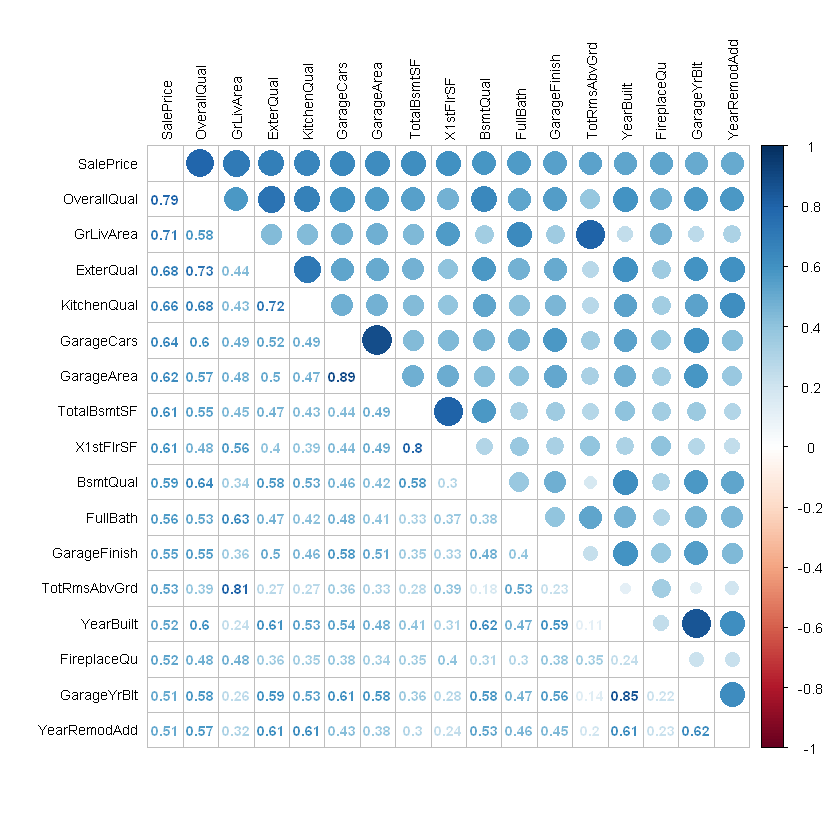

In [89]:
df_numVar <- df[, numericVars]
cor_numVar <- cor(df_numVar, use="pairwise.complete.obs") #correlations of all numeric variables

#sort by decreasing correlations with SalePrice
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))
 #select only high correlations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt", tl.cex = 0.7,cl.cex = .7, number.cex=.7)

Compared to our first visualization, we get 2 more variables with a high correlation, for a total of 8 numeric variables with a correlation > 0.6

How important are the different variables?

The goal of this short section is to get a sense of which variables are most impotant. For this, I will run a Random Forest with both categorical and numerical predictors. 

In [90]:
set.seed(123)
RF_important_variables <- randomForest(x=df[1:1460,-79],y=df$SalePrice[1:1460],ntre=500,importance=TRUE)

In [91]:
# Necessity to specify package from which 'importance' fct is extracted from as it collides 
# with another fct of the same name in an another package

imp = randomForest::importance(RF_important_variables)
imp = data.frame(Variables = row.names(imp), MSE = imp[,1])
imp = imp[order(imp$MSE, decreasing = TRUE),]

- Chart Logic

We only want the first 15 variables, showing by how much the MSE would increase if we randomly moved those variables - that is, how important they are in explaining the model. In reality, this is a rough Random Forest just to get a quick feeling of how the variables interact with eachother. We then flipped the axis to make it easier to read. 

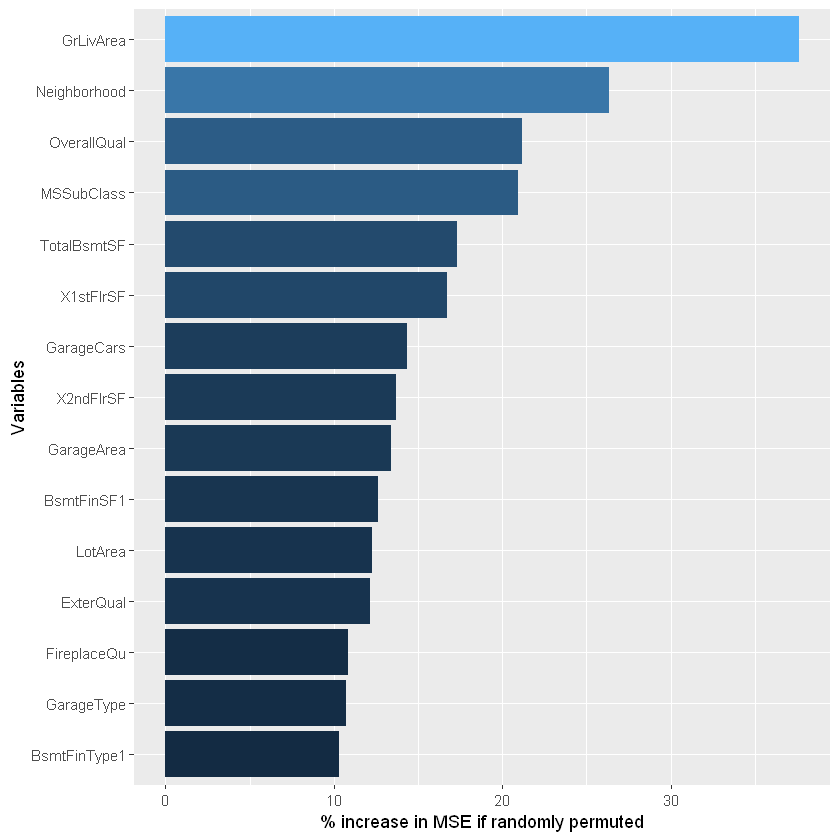

In [92]:
ggplot(imp[1:15,],aes(x=reorder(Variables,MSE), y = MSE, fill=MSE)) + 
    geom_bar(stat='identity') + 
    labs(x='Variables', y = '% increase in MSE if randomly permuted') +
    coord_flip() + theme(legend.position='none')

Out of the most important 15 variables, only 3 are categorical - the Neighborhood, the MSSubclass and the Garage Type, in this order. According to the Random Forest, it seems that the numeric variables are the most important ones in determining the sale price of a house.

# 7. Feature Engineering

As we have seen during the data cleaning part, some variables are broken down into several sub-variables - for example, the proch variables (4 sub-porch variables), which seems like a bit of an overkill for our purposes.

In this section, I will try to come up with new variables that could hopefully deliver more insights running the analysis.

### Total Square Footage

Surprisingly enough, the total square footage is nowhere to be found in the dataset. Thus, I will create a new variable adding the livable space above and below ground.

In [93]:
df$TotalSqft  <- df$GrLivArea + df$TotalBsmtS

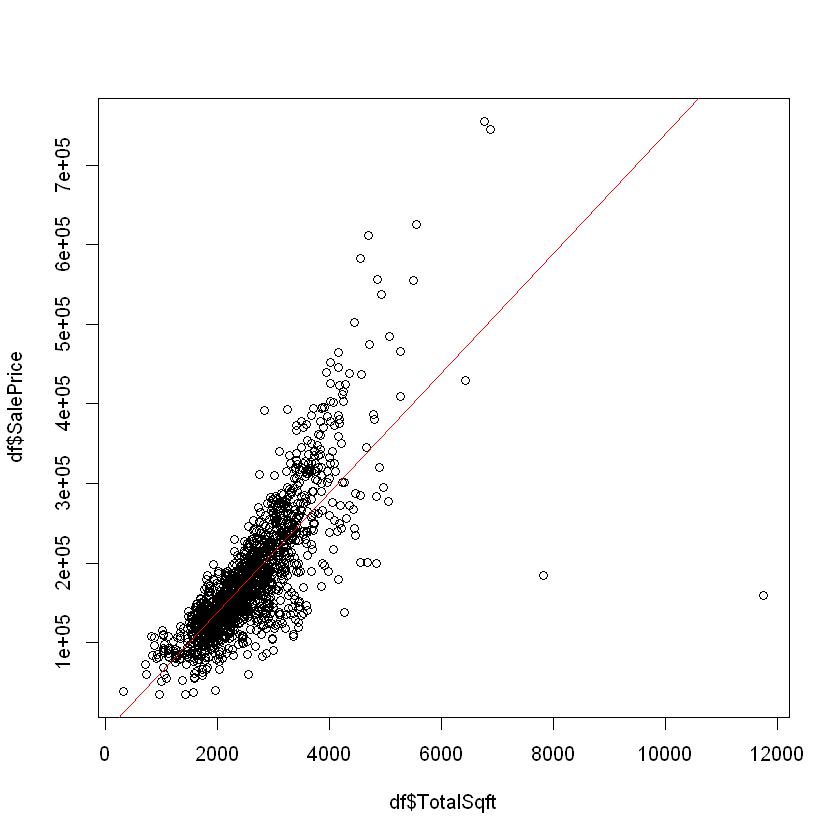

In [94]:
plot(df$TotalSqft,df$SalePrice)
abline(lm(df$SalePrice~df$TotalSqft,data=df),col='red')

In [95]:
cor(df$SalePrice,df$TotalSqft,use='pairwise.complete.obs')

[1] 0.7789588

In [96]:
# Isolate the 2 clear outliers and remove them to run the correlation again

(df[df$TotalSqft > 10000,c('TotalSqft','SalePrice')])
(df[df$TotalSqft >7000 & df$TotalSqft < 8000,c('TotalSqft','SalePrice')])

,TotalSqft,SalePrice
1299,11752,160000
2550,10190,NA


,TotalSqft,SalePrice
524,7814,184750


In [97]:
# Running the correlation again removing the data points at index 524 and 1299, the correlation is much stronger, 
# indicating that the new feature added (total square feet) is statistically significant

cor(df$SalePrice[-c(524,1299)],df$TotalSqft[-c(524,1299)],use='pairwise.complete.obs')

[1] 0.829042

### Bathroom Variables

From the dataset, there are 4 bathroom variables: full bathroom and half bathroom for living areas above and below ground. We will add them all up adding weights based on where the bathroom is located. In this section, We actually tried weighing halfbathroom the same as full ones, and then again with a weight of 0.5, and the correlation is stronger when half bathrooms are weighted down.
We also played around with the weight for the full bathroom in the above and below ground living area, and it turns out that the strongest correlation appears when the Full bathroom in the basement is weighted down to 0.5 as well. 

In [98]:
df$TotalBath <- df$FullBath + (df$BsmtFullBath*0.5) + (df$HalfBath*0.5) + (df$BsmtHalfBath*0.5)

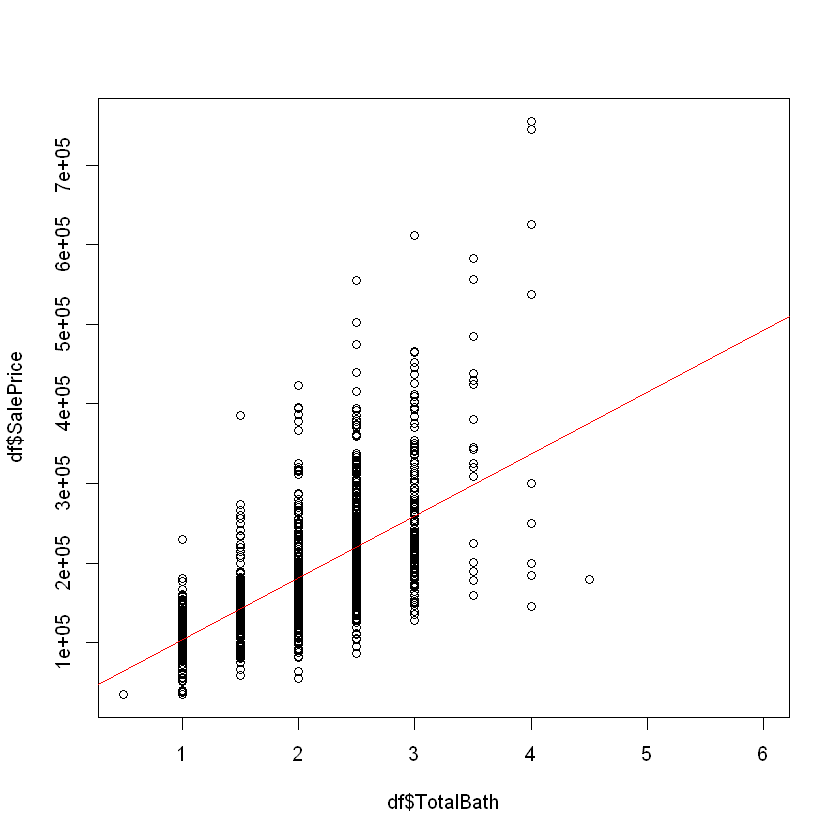

In [99]:
plot(df$TotalBath,df$SalePrice)
abline(lm(df$SalePrice~df$TotalBath,data=df),col='red')

In [100]:
cor(df$TotalBath,df$SalePrice,use='pairwise.complete.obs')

[1] 0.6543122

# 8. Preparing Data for modeling

**Removing outliers**

In [101]:
df  <- df[-c(524,1299),]

**Dropping Highly Correlated Variables**

From the past sections, we have seen several highly correlated variables (see correlation matrix in section 6). Out of the highly correlated pair of variables, I will drop the one with the least correlation with our DV, Sale Price

In [102]:
df[,c('GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 'TotalRmsAbvGrd', 'BsmtFinSF1')] <- NULL

**Predictor Variables**

In [103]:
numericVars <- which(sapply(df, is.numeric)) #index vector numeric variables

In [104]:
length(numericVars)

[1] 51

In [105]:
dfnum <- df[,numericVars]

Many of these numeric variables are actually ordinal, which we will append to the factor dataframe, without transforming them into factors.

In [106]:
ord = dfnum[,c('OverallQual','OverallCond','LandSlope','PavedDrive','Street','HeatingQC','KitchenQual',
               'Functional','ExterQual','ExterCond','MasVnrType','PoolQC','FireplaceQu','LotShape','GarageFinish',
               'GarageQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2')]

In [107]:
ord1 <- c('OverallQual','OverallCond','LandSlope','PavedDrive','Street','HeatingQC','KitchenQual',
               'Functional','ExterQual','ExterCond','MasVnrType','PoolQC','FireplaceQu','LotShape','GarageFinish',
               'GarageQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2')

In [108]:
dfnum <- dfnum %>% select (-ord1)

In [109]:
length(dfnum)

[1] 30

In [110]:
factorVars <- which(sapply(df, is.factor)) #index vector factor variables

In [111]:
length(factorVars)

[1] 25

In [112]:
dffactor <- df[,factorVars]

In [113]:
dffactor <- cbind(dffactor,ord)

In [114]:
cat('There are', length(dfnum), 'numeric variables, and', length(dffactor), 'factor variables')

There are 30 numeric variables, and 46 factor variables

**Standardization**

In [115]:
head(dfnum,2)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSqft,TotalBath
65,8450,2003,2003,196,0,150,856,854,0,...,0,61,0,0,0,0,0,208500,2566,3.0
80,9600,1976,1976,0,0,284,1262,0,0,...,298,0,0,0,0,0,0,181500,2524,2.5


In [116]:
dfnorm  <- dfnum %>% mutate_at(scale, .vars = vars(-SalePrice))

In [117]:
head(dfnorm,2)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSqft,TotalBath
-0.2089718,-0.21639955,1.0470513,0.8975478,0.5339956,-0.2930841,-0.9336018,-0.7830793,1.2102656,-0.1012147,...,-0.7399625,0.2044119,-0.3596783,-0.1033486,-0.2859924,-0.05184043,-0.08960755,208500,0.02401526,1.4621202
0.4984058,-0.06909653,0.1555794,-0.3947970,-0.5669270,-0.2930841,-0.6288477,0.2707427,-0.7845038,-0.1012147,...,1.6151610,-0.7044221,-0.3596783,-0.1033486,-0.2859924,-0.05184043,-0.08960755,181500,-0.02969128,0.7293016


Encoding categorical variables

In [118]:
dfdummies <- as.data.frame(model.matrix(~.-1,dffactor))

In [119]:
dim(dfdummies)

[1] 2917  198

In [120]:
head(dfdummies,2)

MSSubClass20,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,...,PoolQC,FireplaceQu,LotShape,GarageFinish,GarageQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,0,0,0,0,1,0,0,0,0,...,0,0,3,2,3,4,3,1,6,1
1,0,0,0,0,0,0,0,0,0,...,0,3,3,2,3,4,3,4,5,1


Removing levels with few or no observations in train or test as this will cause us issues during the modeling phase

In [121]:
PredictorsWithNoObs <- which(colSums(dfdummies[(nrow(df[!is.na(df$SalePrice),])+1):nrow(df),])==0)
colnames(dfdummies[PredictorsWithNoObs])

[1] "Condition2RRAe"     "Condition2RRAn"     "Condition2RRNn"    
 [4] "HouseStyle2.5Fin"   "RoofMatlMembran"    "RoofMatlMetal"     
 [7] "RoofMatlRoll"       "Exterior1stImStucc" "Exterior1stStone"  
[10] "Exterior2ndOther"   "HeatingOthW"        "ElectricalMix"     
[13] "MiscFeatureTenC"

Removing these columns

In [122]:
dfdummies <- dfdummies[,-PredictorsWithNoObs]

Check if values are absent in the training set

In [123]:
PredictorsWithNoObsTrain <- which(colSums(dfdummies[1:nrow(df[!is.na(df$SalePrice),]),])==0)
colnames(dfdummies[PredictorsWithNoObsTrain])

[1] "MSSubClass150"

Removing the column

In [124]:
dfdummies <- dfdummies[,-PredictorsWithNoObsTrain]

**Merging the standardized numerical values dataframe and the encoded one**

In [125]:
dfmodel <- cbind(dfnorm,dfdummies)

**Skewness of the DV**

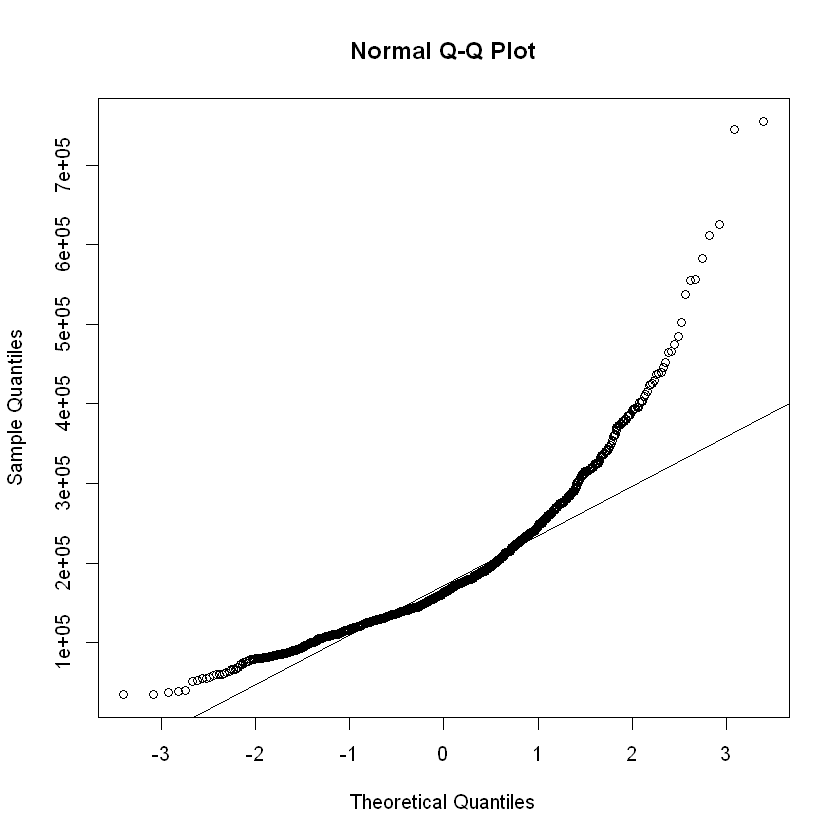

In [126]:
qqnorm(dfmodel$SalePrice)
qqline(dfmodel$SalePrice)

This is not satisfactory - we want the line to be as straight as possible. Applying log, we get a much more acceptable qqplot.

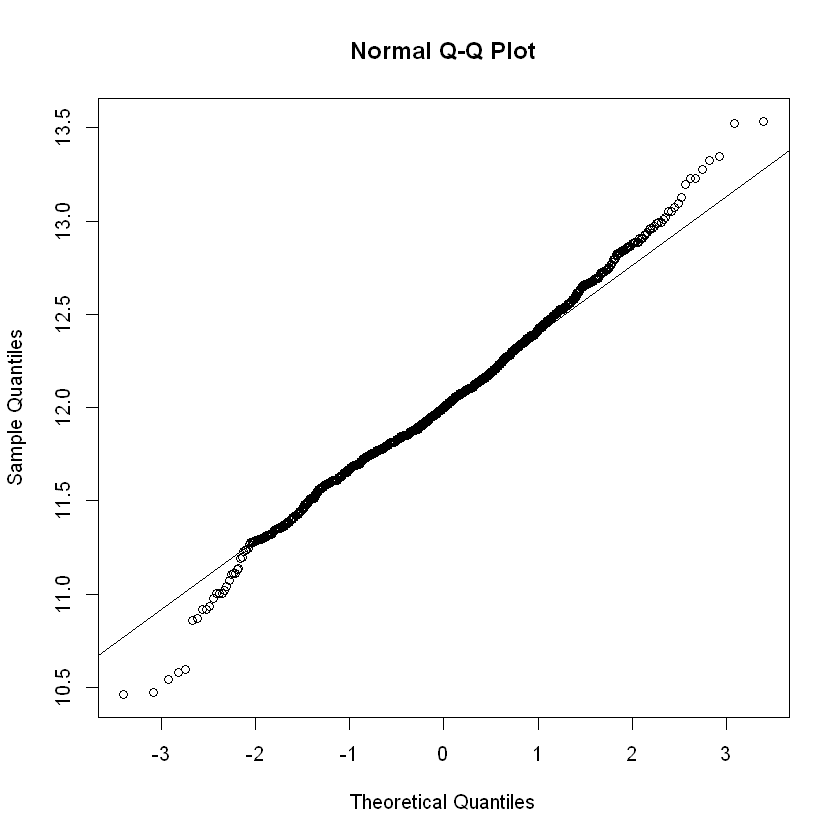

In [127]:
dfmodel$SalePrice <- log(dfmodel$SalePrice)
qqnorm(dfmodel$SalePrice)
qqline(dfmodel$SalePrice)

- Much better

Renaming Columns with out spaces

In [128]:
names(dfmodel)[names(dfmodel) == 'AlleyNo Alley'] <- 'AlleyNo_Alley'
names(dfmodel)[names(dfmodel) == 'RoofMatlTar&Grv'] <- 'RoofMatlTar_Grv'
names(dfmodel)[names(dfmodel) == 'Exterior1stWd Sdng'] <- 'Exterior1stWd_Sdng'
names(dfmodel)[names(dfmodel) == 'Exterior2ndBrk Cmn'] <- 'Exterior2ndBrkCmn'
names(dfmodel)[names(dfmodel) == 'Exterior2ndWd Sdng'] <- 'Exterior2ndWdSdng'
names(dfmodel)[names(dfmodel) == 'Exterior2ndWd Shng'] <- 'Exterior2ndWdShng'
names(dfmodel)[names(dfmodel) == 'GarageTypeNo Garage'] <- 'GarageTypeNoGarage'
names(dfmodel)[names(dfmodel) == 'FenceNo Fence'] <- 'FenceNoFence'
names(dfmodel)[names(dfmodel) == 'MiscFeatureNo Features'] <- 'MiscFeatureNoFeatures'

Train and Test Sets ready for modeling

In [129]:
train1 <- dfmodel[!is.na(dfmodel$SalePrice),]
test1 <- dfmodel[is.na(dfmodel$SalePrice),]

In [130]:
head(train1,2)
head(test1,2)

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,...,PoolQC,FireplaceQu,LotShape,GarageFinish,GarageQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
-0.2089718,-0.21639955,1.0470513,0.8975478,0.5339956,-0.2930841,-0.9336018,-0.7830793,1.2102656,-0.1012147,...,0,0,3,2,3,4,3,1,6,1
0.4984058,-0.06909653,0.1555794,-0.3947970,-0.5669270,-0.2930841,-0.6288477,0.2707427,-0.7845038,-0.1012147,...,0,3,3,2,3,4,3,4,5,1


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,...,PoolQC,FireplaceQu,LotShape,GarageFinish,GarageQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
1461,0.4984058,0.1899006,-0.3396827,-1.112766,-0.56692703,0.5578182,-0.6606877,-0.6792545,-0.7845038,-0.1012147,...,0,0,3,1,3,3,3,1,3,2
1462,0.5455643,0.5286975,-0.4387351,-1.256360,0.03970378,-0.2930841,-0.3513851,0.4446493,-0.7845038,-0.1012147,...,0,0,2,1,3,3,3,1,5,1


# 9. Modeling

Now, having all features processed and engineered, we can start the model training then testing with all existing features as model predictors

## 9.1 Linear Regression with cross validation

We are going to start off with a Linear Regression model with cross validation to set our baseline

This will be used to compare the other models that we are going to build to see how well they perform. Ideally our RMSE values for the following models should be better than our baseline model.

Going to run a linear regression model considering SalePrice as our dependent variable and all other vairables as the predictor or independent variables

In [131]:
set.seed(123)
lm_mod <- train(SalePrice~.,
                  data = train1, 
                  method = "lm",
                  trControl=trainControl(
                    method = "cv",
                    number=5,
                    savePredictions = TRUE,
                    verboseIter = TRUE)
)

+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [132]:
lm_mod$results$RMSE

[1] 0.1233838

The RMSE is 0.1233.. which is a what we will be trying to beat with our subsequent models that we will build

In [133]:
#Predicting on test dataset

lm.predict.test <- predict(lm_mod, test1)
predictions_lm <- exp(lm.predict.test) #need to reverse the log to the real values
head(predictions_lm)

##code to ADD ID column

1461     1462     1463     1464     1465     1466 
118905.7 148824.5 177338.3 202477.9 201390.4 171068.4

In [134]:
lm.sol <- data.frame(Id = testID, SalePrice = predictions_lm)

In [135]:
write.csv(lm.sol, "TestPredlinear.csv",row.names=FALSE)

## 9.2 Lasso Regression

Lasso shrinks coefficients all the way to zero, effectively dropping unecessary variables.

In [136]:
SP <- c('SalePrice')

For Lasso, We remove the variable SalePrice from the samples and run it.

In [137]:
train2 <- train1 %>% select (-SP)
test2 <- test1 %>% select(-SP)

In [138]:
set.seed(123)
my_control <-trainControl(method="cv", number=5)
lassoGrid <- expand.grid(alpha = 1, lambda = seq(0.001,0.1,by = 0.0005))

lasso_mod <- train(x=train2, y=dfmodel$SalePrice[!is.na(dfmodel$SalePrice)], method='glmnet', trControl= my_control, tuneGrid=lassoGrid) 
lasso_mod$bestTune

,alpha,lambda
4,1,0.0025


In [139]:
min(lasso_mod$results$RMSE)
min(lasso_mod$results$Rsquared)
min(lasso_mod$results$MAE)

[1] 0.1137383

[1] 0.8308792

[1] 0.07961131

**Feature selection from Lasso**

In [140]:
lassoVarImp <- varImp(lasso_mod,scale=F)
lassoImportance <- lassoVarImp$importance

varsSelected <- length(which(lassoImportance$Overall!=0))
varsNotSelected <- length(which(lassoImportance$Overall==0))

**Variables selected**

In [141]:
varsSelected

[1] 109

**Variables dropped by Lasso**

In [142]:
varsNotSelected

[1] 104

**Predicting Sales price on test dataset**

In [143]:
LassoPred <- predict(lasso_mod, test1)
predictions_lasso <- exp(LassoPred) #need to reverse the log to the real values
head(predictions_lasso)

##code to ADD ID column

1461     1462     1463     1464     1465     1466 
113144.8 158487.0 177001.1 200043.2 200164.2 170571.3

In [144]:
lass.sol <- data.frame(Id = testID, SalePrice = predictions_lasso)

In [145]:
write.csv(lass.sol, "TestPredlasso.csv",row.names=FALSE)

## 9.3 Ridge Regression Model

Ridge regression performs shrinkage without exclusion of predictors. 
We will first create a matrix of all predictors and a vector of the response before we pass it into the glmner function.

In [146]:
train.ridgeMatrix <- as.matrix(train1[,names(train1) != c("SalePrice")])
test.ridgeMatrix <- as.matrix(test1[,names(test1) != c("SalePrice")])

In [147]:
train.ridge.y <- train1$SalePrice

In [148]:
set.seed(123)

Creating a grid of lambda values which is basically the tuning grid

In [149]:
grid = 10^seq(10,-2, length = 100)

In [150]:
# train the Ridge Regression model using the grid of selected lambdas with alpha=0
ridge.mod <- glmnet(train.ridgeMatrix,train.ridge.y,alpha = 0, lambda = grid)
dim(coef(ridge.mod))

[1] 214 100

### 9.3.1 Ridge regression by K-Fold cross validation

In [151]:
set.seed(123)
cv.out <- cv.glmnet(train.ridgeMatrix, train.ridge.y,alpha=0)

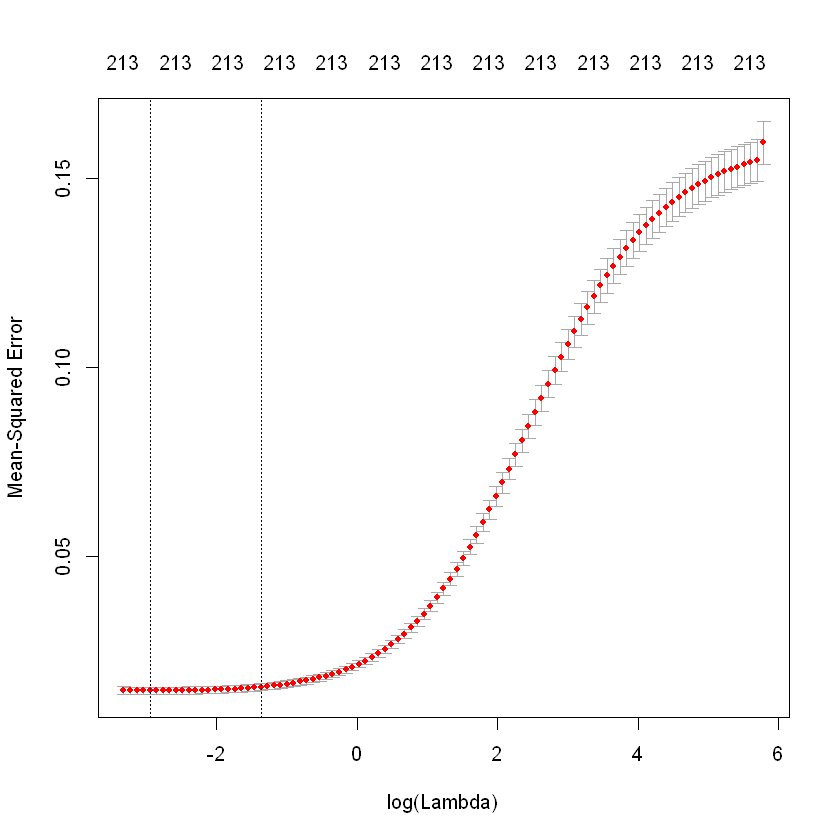

In [152]:
plot(cv.out)

Finding out the best lambda from the cross validation exercise

In [153]:
bestlam <- cv.out$lambda.min
bestlam

[1] 0.05226118

The best lambda value that results in the smallest cross validation error is 0.0522611783512238. Let’s see the RMSE associated with this value of lambda

In [154]:
#use it in fitting the training data
ridge.pred <- predict(ridge.mod, s=bestlam, newx=train.ridgeMatrix)
rmse(train.ridge.y,ridge.pred)

[1] 0.1004259

Now that we have finalized our ridge regression model we will predict SalePrice on the test data set

In [155]:
ridge.test.pred <- predict(ridge.mod, s=bestlam, newx=test.ridgeMatrix)
predictions_Ridge <- exp(ridge.test.pred)
#Code to Add ID column

In [156]:
ridge.sol  <- data.frame(Id = testID, SalePrice = predictions_Ridge)

In [157]:
write.csv(ridge.sol, "TestPredRidge.csv",row.names=FALSE)

## 9.4 Random Forests

Random forests are built on the same fundamental principles as decision trees and bagging. Since the algorithm randomly selects a bootstrap sample to train on and predictors to use at each split, tree correlation will be lessened beyond bagged trees.

In [157]:
# for reproduciblity
set.seed(123)


We will first start off with a basic model before we try and tune the different parameters available to us

In [158]:
rf.mod <- randomForest(
  formula = SalePrice~.,
  data    = train1)

rf.mod


Call:
 randomForest(formula = SalePrice ~ ., data = train1) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 71

          Mean of squared residuals: 0.01649832
                    % Var explained: 89.67

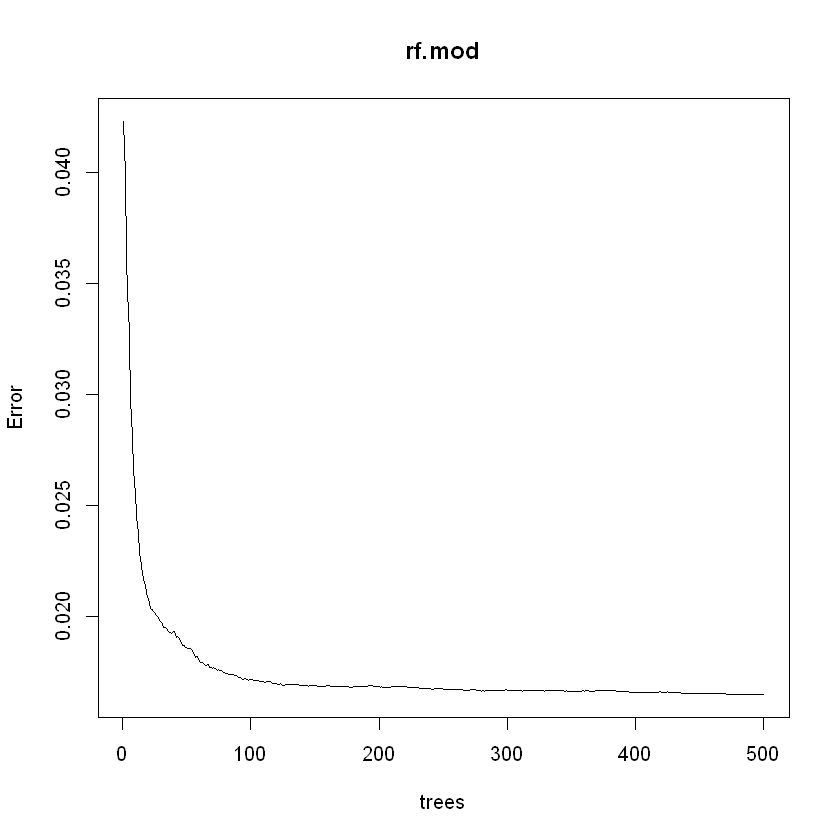

In [159]:
plot(rf.mod)

Plotting the model will illustrate the error rate as we average across more trees and shows that our error rate stabalizes with around 100 trees but continues to decrease slowly until around 300 or so trees.

Random forests are fairly easy to tune since there are only a handful of tuning parameters. Typically, the primary concern when starting out is tuning the number of candidate variables to select from at each split. However, there are a few additional hyperparameters that we will be tuning with the help of a grid.

In [160]:
# hyperparameter grid search
rf.grid <- expand.grid(
  mtry       = seq(20, 200, by = 5),
  node_size  = seq(3, 9, by = 2),
  sampe_size = c(.70, .80),
  OOB_RMSE   = 0
)

# total number of combinations
nrow(rf.grid)


[1] 296

In [161]:
for(i in 1:nrow(rf.grid)) {
  
  # train model
  rf.mod <- ranger(
    formula         = SalePrice ~ ., 
    data            = train1, 
    num.trees       = 500,
    mtry            = rf.grid$mtry[i],
    min.node.size   = rf.grid$node_size[i],
    sample.fraction = rf.grid$sampe_size[i],
    seed            = 123
  )
  
  # add OOB error to grid
  rf.grid$OOB_RMSE[i] <- sqrt(rf.mod$prediction.error)
}

rf.grid %>% 
  dplyr::arrange(OOB_RMSE) %>%
  head(10)

mtry,node_size,sampe_size,OOB_RMSE
70,5,0.7,0.1287370
50,3,0.7,0.1287771
70,7,0.7,0.1290654
70,3,0.8,0.1290725
55,3,0.8,0.1290956
70,3,0.7,0.1291581
85,3,0.8,0.1291800
70,7,0.8,0.1293032
85,5,0.8,0.1293726
95,3,0.8,0.1293965


Currently, the best random forest model we have found uses mtry = 70, terminal node size of 5 observations, and a sample size of 70%. We will repeat this to see what we should expect as error rates

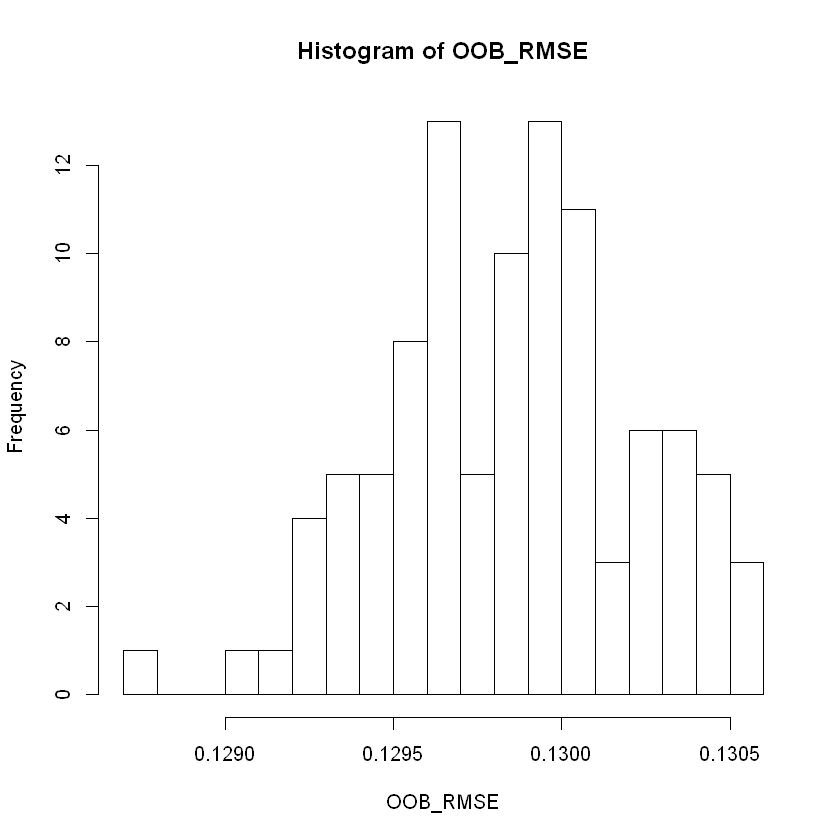

In [162]:
OOB_RMSE <- vector(mode = "numeric", length = 100)

for(i in seq_along(OOB_RMSE)) {

  optimal_ranger <- ranger(
    formula         = SalePrice ~ ., 
    data            = train1, 
    num.trees       = 500,
    mtry            = 70,
    min.node.size   = 5,
    sample.fraction = .7,
    importance      = 'impurity'
  )
  
  OOB_RMSE[i] <- sqrt(optimal_ranger$prediction.error)
}

hist(OOB_RMSE, breaks = 20)

Finalizing the best Random Forest Model

In [163]:
set.seed(123) 
optimal_ranger <- ranger(
    formula         = SalePrice ~ ., 
    data            = train1, 
    num.trees       = 500,
    mtry            = 70,
    min.node.size   = 5,
    sample.fraction = .7,
    importance      = 'impurity'
  )

In [164]:
sqrt(optimal_ranger$prediction.error)

[1] 0.1288818

Now that we have finalised our Random Forest model we can precdict the SalePrice on the test dataset

In [165]:
#
pred_ranger <- predict(optimal_ranger, test2)

rf.predictions <- exp(pred_ranger$predictions) #need to reverse the log to the real values
head(rf.predictions)

[1] 121128.3 156760.8 179915.1 181642.2 193888.1 183044.9

In [166]:
rf.sol  <- data.frame(Id = testID, SalePrice = rf.predictions)

In [167]:
write.csv(rf.sol,"testPredRF.csv",row.names=FALSE)

## 9.5 Ensemble Model with Weights

In [168]:
# construct data frame for the ensembled solution
solution <- data.frame(Id = testID,
                       SalePrice =  as.numeric(predictions_Ridge*.2 + predictions_lasso*.7 + predictions_lm*.1))

In [318]:
write.csv(solution,"ensemble_sol.csv",row.names=FALSE)